In [7]:
from platypus import NSGAII, NSGAIII, DTLZ2, Hypervolume, experiment, calculate, display
%matplotlib inline

# このドキュメントは
https://platypus.readthedocs.io/en/latest/getting-started.html
のサンプルを動かして理解を深める

DTLZ2のサンプル
---
- DTLZ2(単方峰問題)
- パレート最適解集合が凹型のパレート境界を有する3目的最適化問題

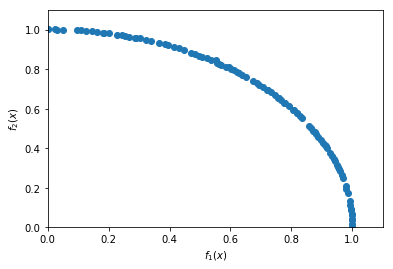

In [2]:
from platypus import NSGAII, DTLZ2

# define the problem definition
problem = DTLZ2()

# instantiate the optimization algorithm
algorithm = NSGAII(problem)

# optimize the problem using 10,000 function evaluations
algorithm.run(10000)

# plot the results using matplotlib
import matplotlib.pyplot as plt

plt.scatter([s.objectives[0] for s in algorithm.result],
            [s.objectives[1] for s in algorithm.result])
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.xlabel("$f_1(x)$")
plt.ylabel("$f_2(x)$")
plt.show()

制約のない問題
---
- 制約のない問題の場合、「決定変数のリスト」と「目的地のリストを返す関数」を定義する

$$
minimize(X^2, (x-2)^2) for x \in [-10, 10]
$$

- $X^2$ と $(x-2)^2)$ の最小値が-10~10になる数の問題?

In [3]:
def schaffer(x):
    return [x[0]**2, (x[0]-2)**2]

problem = Problem(1, 2)
problem.types[:] = Real(-10, 10)
problem.function = schaffer

algorithm = NSGAII(problem)
algorithm.run(10000)

- Problemクラスは2つの引数を受け取る
- 第一引数は決定変数の数
- 第二引数は目的変数の数
- typesでは決定変数のタイプを指定する
    - ここでは、-10から10までの実数値を範囲に指定している
- functionでは問題を評価するための関数を定義する

In [4]:
print("x\t f1\t f2")

for solution in algorithm.result:
    print("%0.3f\t%0.3f\t%0.3f" \
          % tuple(solution.variables + solution.objectives[:]))

x	 f1	 f2
2.001	4.002	0.000
-0.000	0.000	4.001
1.336	1.786	0.441
1.738	3.022	0.069
0.494	0.244	2.268
1.704	2.904	0.088
1.623	2.635	0.142
1.484	2.203	0.266
1.643	2.700	0.127
1.590	2.527	0.168
1.040	1.082	0.921
0.127	0.016	3.508
1.366	1.867	0.402
1.178	1.387	0.676
0.056	0.003	3.779
1.151	1.325	0.721
0.454	0.206	2.391
1.572	2.472	0.183
0.237	0.056	3.108
1.018	1.037	0.964
1.069	1.142	0.868
0.214	0.046	3.191
1.675	2.806	0.106
0.030	0.001	3.882
0.896	0.802	1.219
0.161	0.026	3.383
1.300	1.690	0.490
0.093	0.009	3.636
1.932	3.731	0.005
1.787	3.194	0.045
0.692	0.479	1.710
1.384	1.914	0.380
1.864	3.475	0.018
1.126	1.267	0.764
1.097	1.204	0.815
1.806	3.261	0.038
0.142	0.020	3.452
1.822	3.318	0.032
1.546	2.391	0.206
1.416	2.005	0.341
1.952	3.809	0.002
1.402	1.965	0.358
0.674	0.454	1.760
1.763	3.108	0.056
0.332	0.110	2.782
0.257	0.066	3.040
0.015	0.000	3.939
1.964	3.857	0.001
1.981	3.925	0.000
0.999	0.999	1.001
1.294	1.675	0.498
1.684	2.836	0.100
0.736	0.542	1.598
0.196	0.039	3.253
0.526	0.277	2.172

### クラスを拡張する
- 再利用可能にするためにクラスを拡張することができる
- typesは__init__メソッドで定義する
- 評価関数は、 evaluate メソッドで定義する

In [5]:
class Schaffer(Problem):
    def __init__(self):
        super(Schaffer, self).__init__(1, 2)
        self.types[:] = Real(-10, 10)
        
    def evaluate(self, solution):
        x = solution.variables[:]
        solution.objectives[:] = [x[0]**2, (x[0]-2)**2]
        
algorithm = NSGAII(Schaffer())
algorithm.run(10000)

制約付きの問題
---

$$
minimize(-2x + y, 2x + y)\ subject\ to\ y - x \leq　1 and x + y \leq 7
$$

- この問題には2つの不等号条件が存在する
- まずは不等式を左に整理する


$$
minimize(-2x + y, 2x + y)\ subject\ to\ y - x - 1 \leq　0 and x + y - 7 \leq 0
$$

In [6]:
def belegundu(vars):
    x = vars[0]
    y = vars[1]
    return [-2 * x + y, 2 * x + y], [-x + y - 1, x + y - 7]

problem = Problem(2, 2, 2)
problem.types[:] = [Real(0, 5), Real(0, 3)]
problem.constraints[:] = "<=0" # 制約を入れる
problem.function = belegundu

algorithm = NSGAII(problem)
algorithm.run(10000)

In [8]:
algorithms = [NSGAII, (NSGAIII, {"divisions_outer":12})]
problems = [DTLZ2(3)]

# run the experiment
results = experiment(algorithms, problems, nfe=10000, seeds=10)

# calculate the hypervolume indicator
hyp = Hypervolume(minimum=[0, 0, 0], maximum=[1, 1, 1])
hyp_result = calculate(results, hyp)
display(hyp_result, ndigits=3)

NSGAII
    DTLZ2
        Hypervolume : [0.373, 0.372, 0.364, 0.375, 0.359, 0.363, 0.37, 0.366, 0.372, 0.371]
NSGAIII
    DTLZ2
        Hypervolume : [0.402, 0.406, 0.403, 0.406, 0.404, 0.405, 0.405, 0.404, 0.408, 0.406]
